# 15_A_Calendar_Vis
In diesem Jupyter Notebook werden die Aufnahmezeitpunkte in einer Visualisierung dargestellt.

*Der folgende Code wurde mithilfe von ChatGPT (OpenAI) erstellt und bearbeitet.*

### 1. Visualisierung aller Aufnahmezeitpunkte (UAV-Photogrammetrieaufnahmen FHNW)

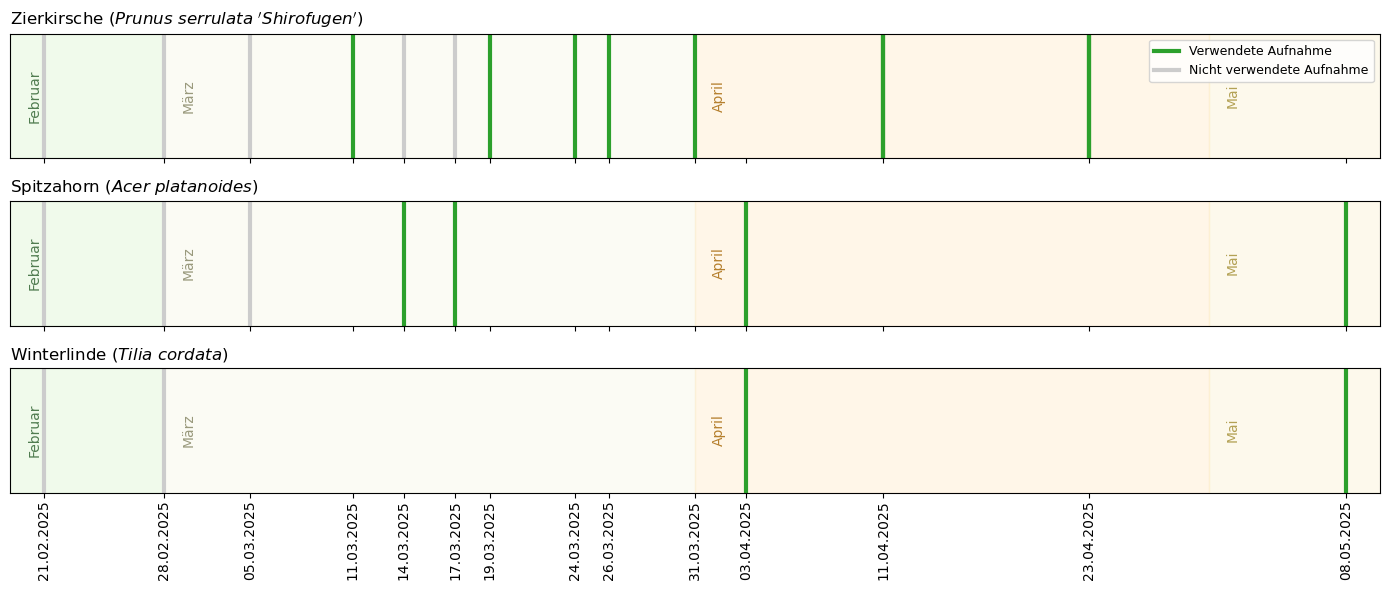

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from datetime import datetime
import locale
import os
from matplotlib.lines import Line2D

# Deutsche Monatsnamen
try:
    locale.setlocale(locale.LC_TIME, 'de_DE.UTF-8')
except:
    locale.setlocale(locale.LC_TIME, 'de_DE')

# Daten laden
df = pd.read_csv("150_BaseData/uav_aufnahmen_fhnw.csv", parse_dates=["Date"])
df["Used"] = df["Used"].astype(bool)

# Farbdefinitionen: Monatsfarben (hell) + passende dunklere Schriftfarben
month_colors = {
    2: "#d0f0c0",  # Februar
    3: "#f5f5dc",  # März
    4: "#ffe4b5",  # April
    5: "#fbeec1"   # Mai
}
# Abgedunkelte Schriftfarben zu den Monatsfarben
month_text_colors = {
    2: "#507c50",
    3: "#99997c",
    4: "#b57f2d",
    5: "#b3a154"
}

month_names = {2: "Februar", 3: "März", 4: "April", 5: "Mai"}

# Richtige Baumbezeichnungen (kursiv für Latein)
tree_labels = {
    "Kirsche": r"Zierkirsche ($\it{Prunus\ serrulata\ 'Shirofugen'}$)",
    "Ahorn": r"Spitzahorn ($\it{Acer\ platanoides}$)",
    "Linde": r"Winterlinde ($\it{Tilia\ cordata}$)"
}


# Plot
fig, axes = plt.subplots(3, 1, figsize=(14, 6), sharex=True)

# Zeitbereich
x_min = df["Date"].min() - pd.Timedelta(days=2)
x_max = df["Date"].max() + pd.Timedelta(days=2)
months = df["Date"].dt.to_period("M").unique()

for ax, tree in zip(axes, ["Kirsche", "Ahorn", "Linde"]):
    df_tree = df[df["Tree"] == tree]

    for month in months:
        start = pd.Timestamp(f"{month.start_time:%Y-%m-01}")
        end = start + pd.offsets.MonthEnd(1)
        month_num = start.month

        color = month_colors.get(month_num, "#eeeeee")
        text_color = month_text_colors.get(month_num, "#555555")

        # Farbhintergrund ohne Lücke
        ax.axvspan(start - pd.Timedelta(days=1), end, color=color, alpha=0.3)

        # Positionierung der Monatsbeschriftung
        if month_num in month_names:
            if month_num == 2:
                label_x = pd.Timestamp("2025-02-20")
            else:
                label_x = start

            ax.text(
                label_x,
                0.5,
                month_names[month_num],
                rotation=90,
                ha="left",
                va="center",
                fontsize=10,
                color=text_color
            )


    # Vertikale Linien für Flüge
    for _, row in df_tree.iterrows():
        color = "#2ca02c" if row["Used"] else "#cccccc"
        ax.axvline(row["Date"], color=color, linewidth=3)

    # Baumtitel: normaler Name + kursiv gesetzter lateinischer Name mit Markdown
    ax.set_title(tree_labels.get(tree, tree), loc="left", fontsize=12)
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    ax.set_xlim(x_min, x_max)

# Unterste Grafik: Datumsbeschriftung
df_above = df[df["Tree"].isin(["Kirsche", "Ahorn"])].drop_duplicates(subset="Date")
tick_dates = df_above["Date"].sort_values()

axes[-1].set_xticks(tick_dates)
axes[-1].set_xticklabels(
    [d.strftime("%d.%m.%Y") for d in tick_dates],
    rotation=90,
    ha="center",
    va="top",
    fontsize=10
)
axes[-1].tick_params(axis='x', which='major', pad=2)

# Obere Achsen ohne X-Beschriftung
for ax in axes[:-1]:
    ax.tick_params(labelbottom=False)

plt.tight_layout()

# Legende für grüne/graue Striche
legend_elements = [
    Line2D([0], [0], color='#2ca02c', lw=3, label='Verwendete Aufnahme'),
    Line2D([0], [0], color='#cccccc', lw=3, label='Nicht verwendete Aufnahme')
]

# Legende im unteren Plot (z. B. rechts oben platzieren)
axes[0].legend(
    handles=legend_elements,
    loc='upper right',
    frameon=True,
    fontsize=9
)

plt.show()




### 2. Visualisierung aller Aufnahmezeitpunkte (terrestrische LiDAR-Aufnahmen)

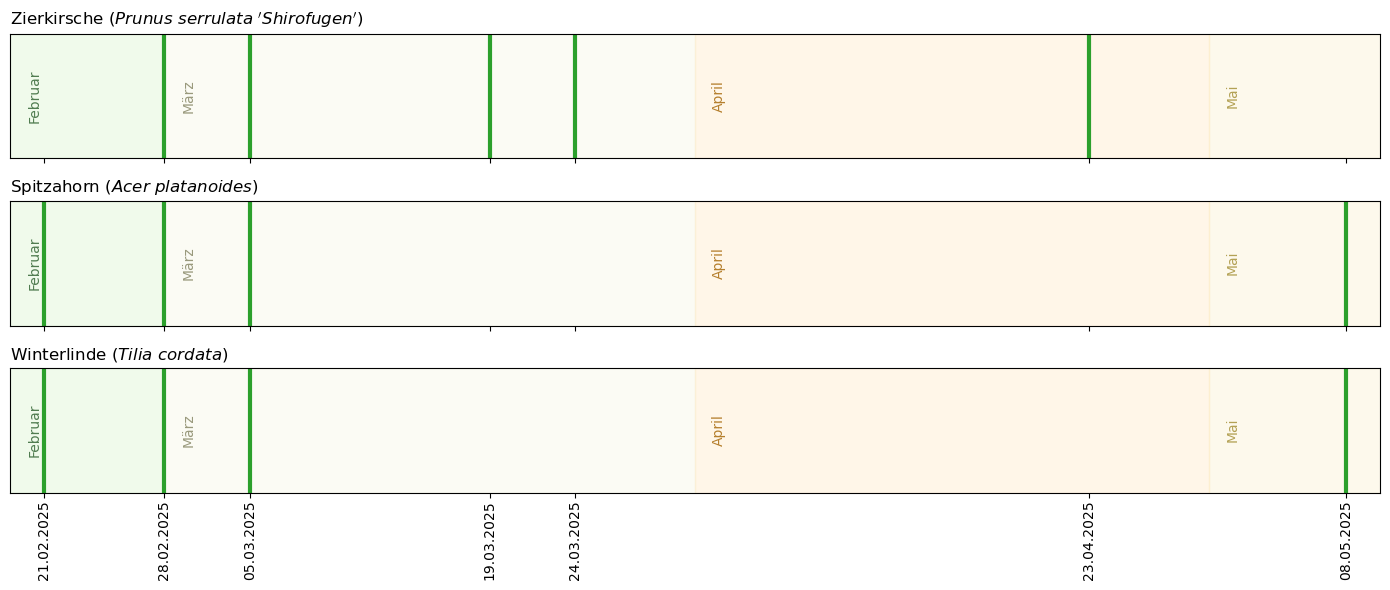

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime

# Daten laden
df = pd.read_csv(r"150_BaseData\tls_aufnahmen_fhnw.csv", parse_dates=["Date"])
df.columns = df.columns.str.strip()
df["Used"] = df["Used"].astype(bool)

# Farben für Monate (heller Hintergrund) + passende Textfarben (dunkler)
month_colors = {
    2: "#d0f0c0",  # Februar
    3: "#f5f5dc",  # März
    4: "#ffe4b5",  # April
    5: "#fbeec1"   # Mai
}
month_text_colors = {
    2: "#507c50",
    3: "#99997c",
    4: "#b57f2d",
    5: "#b3a154"
}
month_names = {2: "Februar", 3: "März", 4: "April", 5: "Mai"}

# Titel mit botanischen Namen (Latein kursiv über Mathtext)
tree_labels = {
    "Kirsche": r"Zierkirsche ($\it{Prunus\ serrulata\ 'Shirofugen'}$)",
    "Ahorn": r"Spitzahorn ($\it{Acer\ platanoides}$)",
    "Linde": r"Winterlinde ($\it{Tilia\ cordata}$)"
}

# Plot-Vorbereitung
fig, axes = plt.subplots(3, 1, figsize=(14, 6), sharex=True)
x_min = df["Date"].min() - pd.Timedelta(days=2)
x_max = df["Date"].max() + pd.Timedelta(days=2)
months = df["Date"].dt.to_period("M").unique()

# Schleife für jede Baumart
for ax, tree in zip(axes, ["Kirsche", "Ahorn", "Linde"]):
    df_tree = df[df["Tree"] == tree]

    # Farbige Monatsbereiche + Beschriftungen
    for month in months:
        start = pd.Timestamp(f"{month.start_time:%Y-%m-01}")
        end = start + pd.offsets.MonthEnd(1)
        month_num = start.month

        color = month_colors.get(month_num, "#eeeeee")
        text_color = month_text_colors.get(month_num, "#555555")

        # Farbfeld ohne Lücke
        ax.axvspan(start - pd.Timedelta(days=1), end, color=color, alpha=0.3)

        # Monatsname – Februar am 20.02., alle anderen am Monatsanfang
        if month_num in month_names:
            label_x = pd.Timestamp("2025-02-20") if month_num == 2 else start
            ax.text(
                label_x,
                0.5,
                month_names[month_num],
                rotation=90,
                ha="left",
                va="center",
                fontsize=10,
                color=text_color
            )

    # Vertikale Striche für Aufnahmen
    for _, row in df_tree.iterrows():
        color = "#2ca02c" if row["Used"] else "#cccccc"
        ax.axvline(row["Date"], color=color, linewidth=3)

    # Achseneinstellungen
    ax.set_title(tree_labels.get(tree, tree), loc="left", fontsize=12)
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    ax.set_xlim(x_min, x_max)

# Unterste Achse: Alle eindeutigen Aufnahmedaten als X-Ticks
unique_dates = df["Date"].drop_duplicates().sort_values()
axes[-1].set_xticks(unique_dates)
axes[-1].set_xticklabels(
    [d.strftime("%d.%m.%Y") for d in unique_dates],
    rotation=90,
    ha="center",
    va="top",
    fontsize=10
)
axes[-1].tick_params(axis='x', which='major', pad=2)

# Obere Achsen: X-Achse ausblenden
for ax in axes[:-1]:
    ax.tick_params(labelbottom=False)

plt.tight_layout()
plt.show()


### 3. Visualisierung aller Aufnahmezeitpunkte (Messstreifen)

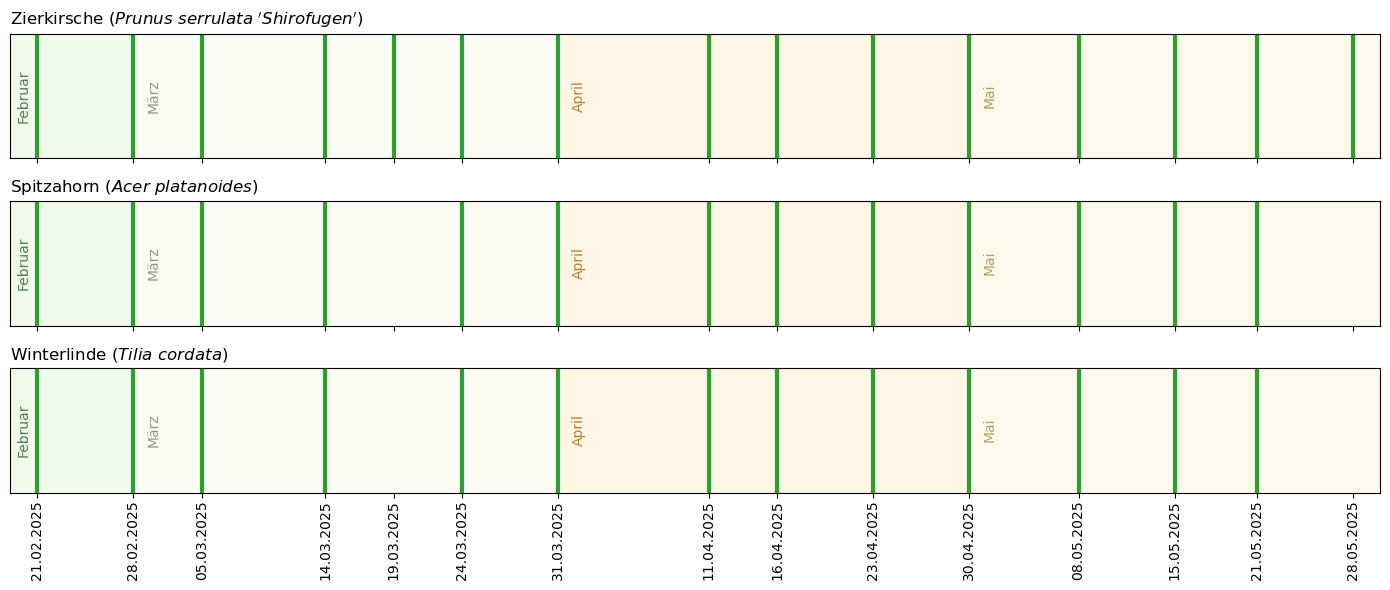

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Daten laden
df = pd.read_csv("150_BaseData/messstreifen_aufnahmen_fhnw.csv", parse_dates=["Date"])
df.columns = df.columns.str.strip()
df["Used"] = True  # Alle Messstreifenaufnahmen gelten als "verwendet"

# Farben für Monate
month_colors = {
    2: "#d0f0c0",  # Februar
    3: "#f5f5dc",  # März
    4: "#ffe4b5",  # April
    5: "#fbeec1"   # Mai
}
month_text_colors = {
    2: "#507c50",
    3: "#99997c",
    4: "#b57f2d",
    5: "#b3a154"
}
month_names = {2: "Februar", 3: "März", 4: "April", 5: "Mai"}

# Richtige Baumbezeichnungen mit kursiven lateinischen Namen
tree_labels = {
    "Kirsche": r"Zierkirsche ($\it{Prunus\ serrulata\ 'Shirofugen'}$)",
    "Ahorn": r"Spitzahorn ($\it{Acer\ platanoides}$)",
    "Linde": r"Winterlinde ($\it{Tilia\ cordata}$)"
}

# Plot vorbereiten
fig, axes = plt.subplots(3, 1, figsize=(14, 6), sharex=True)
x_min = df["Date"].min() - pd.Timedelta(days=2)
x_max = df["Date"].max() + pd.Timedelta(days=2)
months = df["Date"].dt.to_period("M").unique()

# Für jede Baumart
for ax, tree in zip(axes, ["Kirsche", "Ahorn", "Linde"]):
    df_tree = df[df["Tree"] == tree]

    # Farbige Monatsbereiche
    for month in months:
        start = pd.Timestamp(f"{month.start_time:%Y-%m-01}")
        end = start + pd.offsets.MonthEnd(1)
        month_num = start.month
        color = month_colors.get(month_num, "#eeeeee")
        text_color = month_text_colors.get(month_num, "#555555")

        # Farbfeld zeichnen
        ax.axvspan(start - pd.Timedelta(days=1), end, color=color, alpha=0.3)

        # Monatsbeschriftung
        if month_num in month_names:
            label_x = pd.Timestamp("2025-02-19 12:00:00") if month_num == 2 else start
            ax.text(
                label_x,
                0.5,
                month_names[month_num],
                rotation=90,
                ha="left",
                va="center",
                fontsize=10,
                color=text_color
            )

    # Vertikale Linien (alle grün)
    for _, row in df_tree.iterrows():
        ax.axvline(row["Date"], color="#2ca02c", linewidth=3)

    # Achsentitel
    ax.set_title(tree_labels.get(tree, tree), loc="left", fontsize=12)
    ax.set_ylim(0, 1)
    ax.set_yticks([])
    ax.set_xlim(x_min, x_max)

# Unterste Achse: X-Beschriftung aller Daten
unique_dates = df["Date"].drop_duplicates().sort_values()
axes[-1].set_xticks(unique_dates)
axes[-1].set_xticklabels(
    [d.strftime("%d.%m.%Y") for d in unique_dates],
    rotation=90,
    ha="center",
    va="top",
    fontsize=10
)
axes[-1].tick_params(axis='x', which='major', pad=2)

# Obere Achsen: X-Ticks verbergen
for ax in axes[:-1]:
    ax.tick_params(labelbottom=False)

plt.tight_layout()
plt.show()
